In [14]:
#!pip install Pillow
#!pip install pydot
#!pip install networkx

In [15]:
import pydot
import networkx as nx
import pandas as pd
import pprint
from PIL import Image

In [16]:
#Transition probabilities
df_Q = pd.read_csv('../data/probabilities.csv', index_col=0)
#Possible states
states = ['entrance','drinks','dairy','fruit','spices','checkout']

In [17]:
IN_PATH = "markov.png"
OUT_PATH = "resized_markov.png"

In [18]:
# create a function that maps transition probability dataframe
# to markov edges and weights
def _get_markov_edges(Q):
    edges = {}
    for col in Q.columns:
        for idx in Q.index:
            edges[(idx,col)] = Q.loc[idx,col]
    return edges
edges_wts = _get_markov_edges(df_Q)
print(edges_wts)

{('checkout', 'checkout'): 1.0, ('dairy', 'checkout'): 0.1033436358527676, ('drinks', 'checkout'): 0.2156882903258969, ('entrance', 'checkout'): 0.0, ('fruit', 'checkout'): 0.201446768359805, ('spices', 'checkout'): 0.1505650167117619, ('checkout', 'dairy'): 0.0, ('dairy', 'dairy'): 0.7370609721831975, ('drinks', 'dairy'): 0.0108975017991158, ('entrance', 'dairy'): 0.2875755540631296, ('fruit', 'dairy'): 0.0958484038370813, ('spices', 'dairy'): 0.1930606398217412, ('checkout', 'drinks'): 0.0, ('dairy', 'drinks'): 0.0584995785332958, ('drinks', 'drinks'): 0.5985401459854015, ('entrance', 'drinks'): 0.1535258562793821, ('fruit', 'drinks'): 0.054804214499135, ('spices', 'drinks'): 0.162979468406812, ('checkout', 'fruit'): 0.0, ('dairy', 'fruit'): 0.0497892666479348, ('drinks', 'fruit'): 0.0878996607381515, ('entrance', 'fruit'): 0.3774345198119543, ('fruit', 'fruit'): 0.5972637207108036, ('spices', 'fruit'): 0.0908801527932516, ('checkout', 'spices'): 0.0, ('dairy', 'spices'): 0.051306546

In [19]:
# create graph object
G = nx.MultiDiGraph()
# nodes correspond to states
G.add_nodes_from(states)
print(f'Nodes:\n{G.nodes()}\n')

Nodes:
['entrance', 'drinks', 'dairy', 'fruit', 'spices', 'checkout']



/var/folders/yg/k2ykb91n2gq_9nxx2ztytxlh0000gn/T/ipykernel_29670/1742168065.py:6: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='dot')


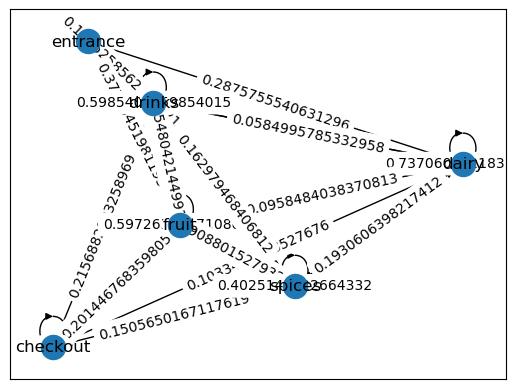

In [20]:
# edges represent transition probabilities
for k, v in edges_wts.items():
    if v > 0.0:
        tmp_origin, tmp_destination = k[0], k[1]
        G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='dot')
nx.draw_networkx(G, pos)
# create edge labels for jupyter plot but is not necessary
edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos, edge_labels=edge_labels)
nx.drawing.nx_pydot.write_dot(G, 'markov.dot')
(graph,) = pydot.graph_from_dot_file('markov.dot')
graph.write_png('markov.png')

In [21]:
def white_square(source_image):
    size = tuple([2*i for i in source_image.size])
    layer = Image.new("RGB", size, (255, 255, 255))
    layer.paste(
        source_image,
        tuple(map(lambda x: int((x[0] - x[1]) / 2), zip(size, source_image.size))),
    )
    return layer

In [22]:
img = Image.open(IN_PATH)
framed_img = white_square(img)
framed_img = framed_img.resize((100, 100), Image.ANTIALIAS)
framed_img.save(OUT_PATH)

/var/folders/yg/k2ykb91n2gq_9nxx2ztytxlh0000gn/T/ipykernel_29670/3857275965.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  framed_img = framed_img.resize((100, 100), Image.ANTIALIAS)


In [ ]:
#if __name__ == "__main__":
    #img = Image.open(IN_PATH)
    #framed_img = white_square(img)
    #framed_img = framed_img.resize((100, 100), Image.ANTIALIAS)
    #framed_img.save(OUT_PATH)